In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import argparse
from tueplots import bundles
from tueplots.constants.color import rgb

In [6]:
# Adjust the following paths to your own
CHARTS_PATH = "../../dataset/charts_processed.csv"

In [8]:
df = pd.read_csv(CHARTS_PATH)

In [10]:
def retrieve_yearly_data(df, year):
    """
    Retrieve the data for a given year
    """
    return df.loc[df['year'] == year]

def retrieve_monthly_data(df, year, month):
    """
    Retrieve the data for a given month of a given year
    """
    return df.loc[(df['year'] == year) & (df['month'] == month)]

def retrieve_daily_data(df, year, month, day):
    """
    Retrieve the data for a given day of a given month of a given year
    """
    return df.loc[(df['year'] == year) & (df['month'] == month) & (df['day'] == day)]

In [135]:
"""
Composite functions:
The idea is to make it easier for the user to retrieve the data user wants
based on country and year.
"""

def plot_streams_per_rank(df, country, year):
    """
    Plot the average number of daily streams per rank for a given year
    """
    df_country = df.loc[df['region'] == country]
    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    
    df_country = df_country.loc[df_country['year'] == year]
    streams_per_rank = df_country.groupby(['rank'])['streams'].mean()
    x = streams_per_rank.index
    y = streams_per_rank.values

    # get standard deviations for each rank
    std = df_country.groupby(['rank'])['streams'].std()
    std = std.values
    
    # create formatter
    def thousands(x, _):
        return '%1.fK' % (x * 1e-3)
    
    formatter = plt.FuncFormatter(thousands)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    # ms: width of the dots
    # lw: width of the line
    ax.plot(x, y, '.-', ms=2, lw=0.85, color=rgb.tue_darkgreen, label="average number of daily streams")
    plt.fill_between(x, y-std, y+std, alpha=0.9, color=rgb.mps_gray, label="standard deviation")
    ax.set_xlabel("ranking")
    ax.set_ylabel("streams")
    ax.legend(loc="upper right")

    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax.set_xlim([-2, 201])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)
    ax.yaxis.set_major_formatter(formatter)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.3)
    plt.show()

def plot_streams_per_rank_all_years(df, country):
    # do the same thing for 2017, 2018, 2019, 2020, 2021 and plot them all in one figure
    df_country = df.loc[df['region'] == country]

    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    # create formatter
    def thousands(x, _):
        return '%1.fK' % (x * 1e-3)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)

    for year in range(2017, 2022):
        df_year = df_country.loc[df_country['year'] == year]
        streams_per_rank = df_year.groupby(['rank'])['streams'].mean()
        x = streams_per_rank.index
        y = streams_per_rank.values
        ax.plot(x, y, '.-', ms=2, lw=0.85, label=year)
    ax.set_xlabel("ranking")
    ax.set_ylabel("streams")
    ax.legend(loc="upper right")
    formatter = plt.FuncFormatter(thousands)
    ax.yaxis.set_major_formatter(formatter)

    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax.set_xlim([-2, 201])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.3)
    plt.show()
    
    

C:\Users\karab\AppData\Local\Temp\ipykernel_8332\1150581017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
C:\Users\karab\AppData\Local\Temp\ipykernel_8332\1150581017.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
C:\Users\karab\AppData\Local\Temp\ipykernel_8332\1150581017.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

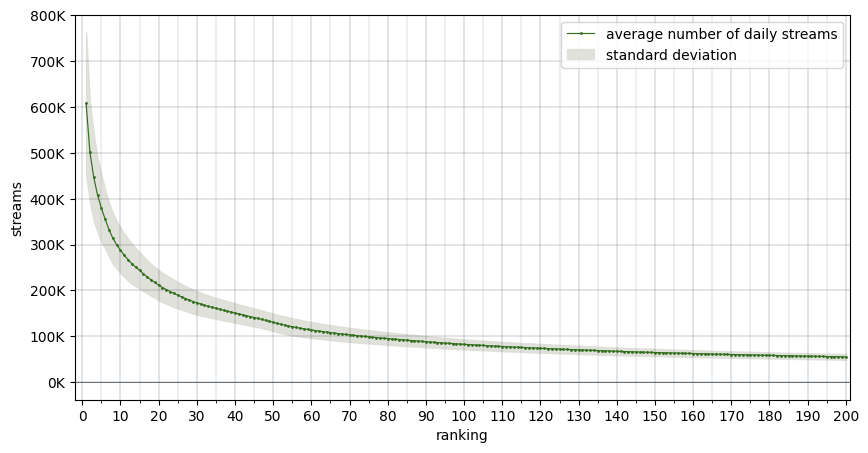

In [136]:
# for each rank, get number of streams and plot it where x axis is rank, y axis is number of streams
plot_streams_per_rank(df, "Germany", 2021)

C:\Users\karab\AppData\Local\Temp\ipykernel_8332\1150581017.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
C:\Users\karab\AppData\Local\Temp\ipykernel_8332\1150581017.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
C:\Users\karab\AppData\Local\Temp\ipykernel_8332\1150581017.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

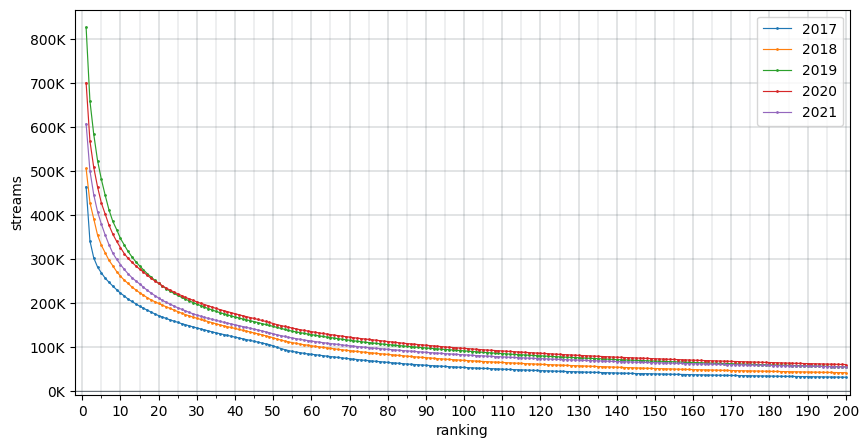

In [137]:
plot_streams_per_rank_all_years(df, "Germany")